# Genetic Algorithms

In [1]:
! pip install opencv-python

In [2]:
import os
import random
import time
from urllib import request

import cv2
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt

In [3]:
POPULATION = 300
GENES = 16**2
GENERATIONS = int(1e4)
SEED = 42

np.random.seed(SEED)

pop = np.random.uniform(0, 1, size=(POPULATION, GENES))

print(pop.shape)
pop[:10, :10]

(300, 256)


array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.93615477, 0.6960298 , 0.57006117, 0.09717649, 0.61500723,
        0.99005385, 0.14008402, 0.51832965, 0.87737307, 0.74076862],
       [0.93272848, 0.86606389, 0.04521867, 0.02636697, 0.37646337,
        0.81055333, 0.98727613, 0.15041689, 0.59413072, 0.38089086],
       [0.34208175, 0.8212573 , 0.11063174, 0.84645229, 0.12748866,
        0.39728729, 0.79729537, 0.14991743, 0.2292514 , 0.72225257],
       [0.94426649, 0.47421422, 0.86204265, 0.8445494 , 0.31910047,
        0.82891547, 0.03700763, 0.59626988, 0.23000884, 0.12056689],
       [0.61815573, 0.70246497, 0.55964868, 0.00977085, 0.32646131,
        0.51771164, 0.0878665 , 0.35062693, 0.03320311, 0.0785785 ],
       [0.18114935, 0.68111785, 0.18143835, 0.52516338, 0.70904626,
        0.10687692, 0.56731222, 0.25656278, 0.96292688, 0.48354565],
       [0.51222192, 0.68022778, 0.0416729

In [4]:
def load_target_icon(icon_url):
    icon_path = './media/icon'
    
    request.urlretrieve(icon_url, icon_path)
    
    target = cv2.imread(icon_path, cv2.IMREAD_GRAYSCALE)
    
    return cv2.resize(src=target,
                      dsize=(16, 16),
                      interpolation=cv2.INTER_AREA)

In [5]:
def show_icon(icon_arr):
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(icon_arr, cmap='Greys')
    plt.show()

(16, 16)


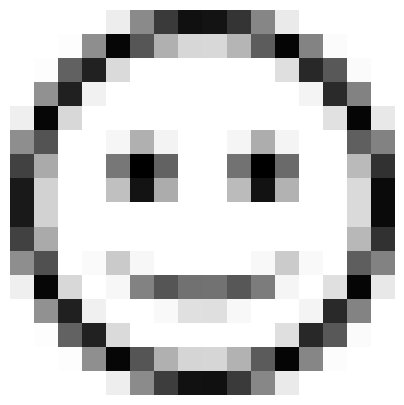

In [6]:
TARGET_URLS = { 
    'Wolf' : 'https://www.clipartmax.com/png/middle/235-2350420_other-wolf-icon-16x16-images-loup-icon.png',
    'Stop Sign' : 'https://images.uline.com/is/image//content/dam/images/H/H2500/H-2381.jpg',
    'Plus' : 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2NJycvmconYsFlY2cEZRq5we90isDOh5l7hC0vzTxPBgHtfp7DkE9MpEl5P9ViQ_F0VQ&usqp=CAU',
    'Happy' : 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAilBMVEUAAAD8/vz///+1t7XLzcspKik2Njb5+/mpqqnx8/Ho6uj3+ffb3duhoqHi5OJsbWx+f37Bw8G6vLp5enmXmJdzdHPNzs1UVVSjpaPm6OYWFhYgICCMjYyGh4ZMTUxcXVxERETW19Y9Pj0oKCgODg5BQUFnZ2eLjIswMDAbHBtPUE9aW1oUFBQiIyKCZkikAAANTklEQVR4nO1dZ5faOhBdC4NNM3UpCXULYbPJ//97zzZdM5JmZNkW7+R+yDkbsKyL2mjqy0sVeG82m++bOO5/NW84VvLq0nH4ns7CUKAIU8wa823dfbTGbjhbLk9cAhQXpklntX66Af3uJ4GGG2QaBPv+ru5eU/E2DqncJJ7t8aRZd++NOMSJBbsbyWjfn9fNQYP5om1P724op3UTwfEWR4XpXUmGw4+6+chYh27Y3UiOXuvmdIfWuOOU35nkclA3sTM+xo5mJ+SY+LAiB8ty6J05isWPevm9JiXyO5EM4vf6+DXHZfPLOUZxTfx+VMIv5ygmdRBsVMUv55hUfnasOzx+6PWJ9fzys0p+Lfr5fibTSDE9tk44TrM/GwmLpwjGPysjuAoo3cp63+32pitNS7/703HUJfIU7WE1/DZdQneyi+3+ldij4WuypJBMRblyqeX46Ju7kkmVQ+YlaL6aEUiKduk7zjYx9CKbcfHmy6btr21snK9C7F1TesTA2IF2XEiz9DpuG19R5hV5rH15tmU6uA6s93qOIijt/N/NdG9Oh2/oSGNmOozE2M17ZGx0rxWOt/L0QNK9rdty+bIzFtrxG+1cv2+qW5Ci++36fbolWAa/DClHzY/ad/w2NUFRzpTJoROe3FJsqd9Usii1Uk9VlxRbkeo1QqzdvQbFbqTkKPpWggWCpopgKmBUYFGZKC9qouNGq3pUEuxUpO5TDqPouGheNUVT8bMyvfRAtauKdvHGVSNYrXXhvaEcxaI/s2oNiqhiO9hUsZ2LTrHtRjlFG446TsenqiuFDg0FwRKlex3CEijiM0MEG2e9ZkGxGAtQxEU10auJ4MvL1jFFBcGZ007zsMVPRmG3rx/wxkLHneZh00N7ZSX8b3CCdVlJrkBVYaJr0RI6H4QHDkw4Rb5iY4+2cyihx2ygE5U9udZoK54Y1vG1yFMyDlCC9W4yd8AmqhCsJvwmqKDI0YajDXhEEJ+ojFNx5T1BBcU34sNfiPmsVkkGBcaQanxDDgrmMq4CmIwqaHo/VJipTdhWY4AwbJMM4dhv48lB+IgRMtcoog32XPU3ehIQWxhhLHbIUw4UWuUAk53/mh5Ctpmu8aG6sIngcCwMzwyRIfRwl7kgRrpreARq0J2bsZxiCfurv2TAIRRJzQ6eevzkDiLUnvtw59VhCnvc03wdquvq11qYgKwr9aC04IgnFfbVDi3OICJD6FNIgALIPFUN4hf8ahWecoUBDkXlIEINsCjNB8El4HVWMYg/4BdL8j1yDSCHKfZHZD57fRTeMIeHImpUBGeh0Hn3egXaIAINqRs3gEoAL+0R4iQC9Gulu8o4BBxEeMy9ge94eytEAFYiIqqAq/0zDSE2iGCXhPtMHR21xm/QffmkA2v1Wc7CC+AgGr/gyiuuIoDTXNadPvsQvnzIy0ySqYFoV+el4tvKwxlslY9ngWznsLgXTsKklyKZ/rbp37WVfW8pRC/5xfZJ2kkEHw3WLfkCwr3a/x1Ft6C7ru058zmLTkEz2b8drgcJmKb3xiTgWBLxYm8fHUBtOTakVjq8cQQr7d6IId8MtcocAOjEK8SS1bkM0DOfGePUBM/fTVP5rGDdKl4x3broMhfSFG2lzXE/AON0Ow+gTMpo91XlQszajeHl9NwKY9+SFeB32yVonuFh9K2OFmAQRIwJl1aoluv0SFQPFBhexk6qjkcUS7KK4F0dHcMxr4PFdt3wAHe6Akrh1Xpqhmzx0EX9MWLx5bl4dc4A7kF0/Qzu3ndB+w+tFcVSPneGrmqAF4zzB32ZOt2xRBuRSHZw0Ufe0qfCBzi2zo78skTHsNpru5aC1MinvhXGIMo/1WUhgibJh5Bij7+1RDJcoV6C962QY8fkLfnypNwgXaDBnQTvmiJNMN1ulbdC3msAw9Pwyz8h416h7xnVicM01en7wpd0gzhTmShPESOgo4AMJwzpPzm4I+ULTjaF2097iKhihuBEzDcCeQPC1MU4TFtEUPkYAoaZcAwObbpQ+sfEj9Y3hwzBistkPuDjR5pZJ5jWIe3INzJkGFAw4UVmyIk/0YWT522ZHJRyGJOJMK6a2BjKKn8OQ1neA33bUVpZmFpheEZ25WePyNWJ4QP1buobqRVwAZdB7xBwthBNKFGwXIT0+bCoamU0euXWCsftjMSQ0Z7+3pM3TwFipbbtEGD4VZCh/gZMtgzoBpHnOQgOxFVRhpo1xIgnUyt7uNp3WaWYKWSKMVTLNYK2kZ6AxzrmPxMva4PsA4YwZPt0q4JzeY63ylaY/sllMMQ7x85XhbfS5RovSmGYboWgdyxN7gkHpBX6JeCCchi+7ELJpmIVQ/Tde+QoxIifOaUkhukFJbykksvzcVtmVPvei7tmxnRt9w2lMXx5+ZyOc+Nhb7QtkKJyMxh1chPkaGfDr1SGnuAfw38M/cc/hv8Y+g8CwyfzSZTx/2dYwv3QM7i/4/sG93oa34Dp2oroS/0DxrCIzts/YDrvInYL/+Da9uQfMNvTH9mAZJM2yxcA16BcnSJbufnqH3+A2oDhZlpRFYkygJuZgBPKU4UDPQJspblOrIA/jW9Q+NMU8InyDcBR4ewBEMgUfa6xqAWQaM5bSgHfRM8AAmPOW0oB/1K/ALMHnf1LC/gI+wUYYnj5BHzwFIkGIMBpeBWxi/jq+wS1r36ReAuPoIm3gDEzhSLsyoPe918TMwOHV3/Pn9Z0nAz0gUbAUfbO2wUsRH0s/kenUUOCs2OozyWjjV0Dzh4m169Ou/KMwgtTrN4vmcR9/CE7hnQrxLJSjpO20TdAG0PKjwM+ZCXIKrsqv42EUdCCcsvDEPBjudMGRVANx89RZto3rXxDLDcUa4xhrpkGS4hx6ZVYjlmQsdmFDKT8knNcgQSEZtk0V9KJkrfVY3iK7TbKkXAWSsoYc+YMiHzmZ+uxNDH2cCo5TPGRk/UX0DoBI6nNa+zsqJWux1JEgMm5tpwIzR46hBGC+WkI/q/b3sWDKSF55TNwq9hOuq4S8tNA2ZQU5XA5ZrLiqltn6VCag1tFcxJBSo4h2yRDt5NUiHboJF/I67578+GjaW8peaKAnooaqrK+603mkFaMZHPVvaOXtkiSnGi5vqzztR0eQhIy573G3OqUfD80Oo/VcqmKTWLSPTCIVH3ND+kFmQNm2JizzpDtfDSTiwELqqEPbKSKnHvIIFLDCaZyJv7cgzKZTSiLaLee7JdIqWPRpjpgwqFRjD2SvpQ6Dm8zJHFH1usoEtO+6iR5X/QXIsILrAu6tR3JfanIUgSzDjPyl66VcWxCC9VDHXrlOnr+0oI5aMfkUvdGCE5AHgzbUd/fkZS8HDtUU10ylMkvZkjzrDzCWDpvlur03QFHwfQdZOWCdpDP+7XYXE23JuZtjJnP20VO9jd7jqkAz9UasHOyO8mr32x0LUhmCcz4Eh87r76r2gifMx7JTAxaWSh9LGojQBEvCLpWRVUH2Q2BxDITZe0y9dnUt0BrlFjmLT/uGiPNoX5hJ0YD2woaVjVKXNeZ+R3HsgRzL9L04wJKHrs6M2iKg6hgmZLNr2HSSbE8ZUTMsVivCmqwbGsFYdmtnFWP3RwOB1daK/t6T+gG5Z/ncIGaXc9Rdw2L4adviU9aO4+TgfxJ6x9yRCLsDPOJYuEaloo6pN6sRQd1SBW1ZD0ZRRe1ZFX1gL0YRbweML+gPV7T2YNRdFXTWVWXu3aK7upy+1lbfYArLa1qq6syw9a6Frf4XUylATZCQbG+UcRk0cBG0XKFgmJdNR9VSWyKRNtFOMWAvzU7gCInVbFwwhZOsY6I709VVwrGSzZV7UZW6il7KPYYB9EhRxVFdoKjInhXLMFAdIgZtTVQTtQKY2sUpyDvSqiGahR5NrAiUNp7XBVOU63F7EpWgXMiLJ9xfX3syoNHNVGzc6PsmkI7tcHOZdT5mzqxoWiXGpCpMUg6DqtXVy8QJXJcBWqTgPO8AZoCDUKMdo7fluHPXJPEV3TdJ0ZY6H5PMXI+jtO2xqYjojJ8Wjc6K5LruZrOT93bZiU57Wqz4QrRaTiS5FqhwSRX3gauq5aScQz2xWWAt/XewK/Um83AYNVNJ2tcqBj7YBmZXtGzvdATkRg5ChHb3ZA/+rHRLs6s42WFFWKZgiMZDnkK2rfNKCSY/UW7iqqFX/r029eRTPavtO11PlkkEcWrQVRWg1knajyy7EbxVNur/rTTNXkzXBtsVxefbNrOJZ7p4mkg0PtfgoaCaqOT1/p88zhPmmupooHlZ6UEXzLvKWfupASCSR11UX84dJk18KtKmQDQHJO2nKL8ojrTA/w2CQDF+QUxryaqczRLnatCLDzI0fFnzNwX6fS6viRTbaVnh3OO6fngVZ6cjSM//Ss90fAuc8XHr8DRbE2bCYelR1BbYb5oFyaZLr7ZqnLxhYFDvLcnmcVJ7QcF0vJXhNZ6TPXwfmQn2o3W82Q0XDRUQWkoNxEk/SfMKrqe9JYdzT3i/NGy01/v6u5rAWy3h1kY7rHbU5j+/3xbeRqYknBspvg5jHMM/mZ/VbTk/gPQmaTgDLt5jAAAAABJRU5ErkJggg==',
    'Art' : 'http://www.indianruminations.com/wp-content/uploads/what-is-modern-art-definition-2.jpg',
    'Abstract' : 'https://scx2.b-cdn.net/gfx/news/2020/abstractart.jpg'
}

TARGET_ICON_URL = TARGET_URLS['Happy']
target = load_target_icon(TARGET_ICON_URL)
print(target.shape)
show_icon(target)

In [7]:
def render(individual):
    return np.reshape(individual, (-1, 16))

In [8]:
def fitness_func(individual):
    return (np.square(render(individual) - target)).mean(axis=None)

In [9]:
def evaluate(pop):
    return np.array([fitness_func(ind) for ind in pop])

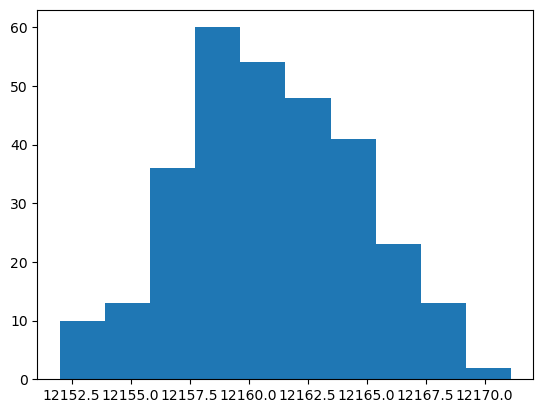

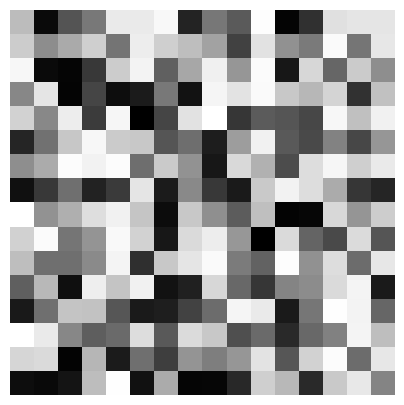

In [10]:
plt.hist(evaluate(pop))

show_icon(render(pop[0]))

In [11]:
def elite_selection(fitness):
    return fitness.argsort()[:2][::-1]

In [12]:
parents = elite_selection(evaluate(pop))

parents

array([287,  35])

In [13]:
def crossover(parent_1, parent_2, crossover_rate):
    child_1, child_2 = parent_1.copy(), parent_2.copy()
    
    if random.random() < crossover_rate:
        pt = random.randint(1, len(parent_1) - 2)
        
        child_1 = np.concatenate((parent_1[:pt], parent_2[pt:]))
        
        child_2 = np.concatenate((parent_2[:pt], parent_1[pt:]))
    
    return child_1, child_2

In [14]:
crossover(parents[0], parents[1], .15)

(287, 35)

In [15]:
def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = individual[i] + random.uniform(-.1, .1)
    return individual

In [16]:
mutation(pop[parents[0]], .5)[:10]

array([0.323471  , 0.54985193, 0.14255401, 0.63895465, 0.00891074,
       0.18946512, 0.71229472, 0.27689235, 0.41996224, 0.83206097])

In [17]:
def simple_ga(pop, crossover_rate=.5, mutation_rate=.05):
    parents = elite_selection(evaluate(pop))
    
    children = np.zeros((POPULATION, GENES))
    
    for i in range(POPULATION):
        offspring = crossover(pop[parents[0]], pop[parents[1]], crossover_rate)
        
        children[i] = mutation(offspring[0], mutation_rate)

    return children

In [18]:
pop = simple_ga(pop)
pop = simple_ga(pop)

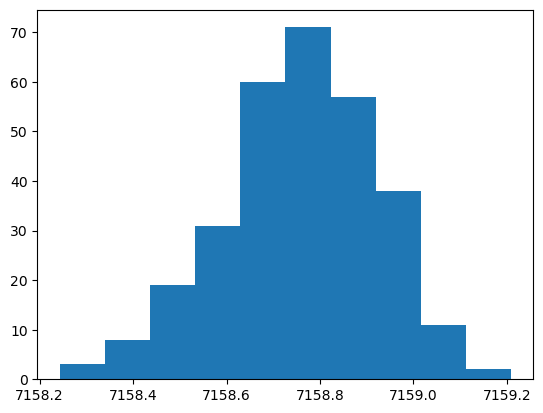

Generation: 9901
Max Fitness: 7159.208643017402
Min Fitness: 7158.243630009019
Mean Fitness: 7158.756665378095
Std Fitness: 0.16504610823987304


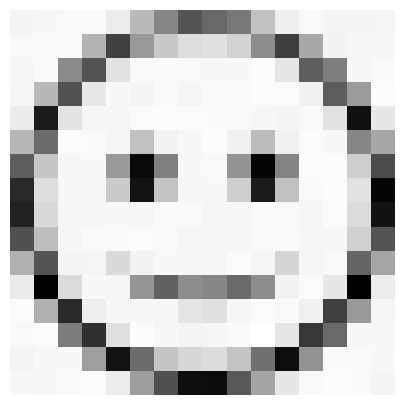

In [19]:
pop = np.random.uniform(0, 1, size=(POPULATION, GENES))
RENDER_GEN = 100

for i in range(GENERATIONS):
    pop = simple_ga(pop)
    
    if i % RENDER_GEN == 0:
        clear_output()
        
        fit = evaluate(pop)
        
        parents = elite_selection(fit)
        
        plt.hist(fit)
        
        plt.show()
        
        print('Generation:', i + 1)
        print('Max Fitness:', np.max(fit))
        print('Min Fitness:', np.min(fit))
        print('Mean Fitness:', np.mean(fit))
        print('Std Fitness:', np.std(fit))
        
        show_icon(render(pop[parents[0]]))
        
        time.sleep(1)